## Create function that can isolate human features through the use of Haar-like features

In [22]:
def haar_like_features(image, feature, size):
    '''
    Args
        image (ndarray): input image
        feature (int): chosen filter
            1 - 2-rectangle horizontal 
            2 - 2-rectangle vertical
            3 - 3-rectangle horizontal
            4 - 3-rectangle vertical
            5 - square
        size (int): scale of size (orignal proportion multiplied by scale)
    Returns
        output (ndarray): array containing features
    '''
    
    # Integral image calculation (can use np.sum(img[:n][:n]) actually)
    print('Calculating integral image...')
    integral = image.copy()
    for x in trange(len(image)):
        for y in range(len(image[0])):
            if x != 0: integral[x,y] += integral[x-1, y]
            if y != 0: integral[x,y] += sum(image[x][:y])
    print('Integral image calculation complete!')
    
    # Convoluting 
        # 1. Set one-pixel padding layer on the top and left-hand side of the image
        # 2. Loop through the image from the first pixel till the last pixel that can fit the haar mask
        # 3. Identify each pivot point in the Haar feature (6 to 9) and use the formula to calculate the value
        # 2. Append the value and return
    print('Calculating features...')
    output_array = []
    output = np.zeros((image.shape[0] + 1, image.shape[1] + 1))  
    output[1:, 1:] = image
    feature_size = np.array([[1,2],[2,1],[1,3],[3,1],[2,2]])*size
    length = feature_size[feature-1][1] # horizontal length of the haar mask
    height = feature_size[feature-1][0] #vertical height of the haar mask

    for x in trange(1,output.shape[0]-height+1):     
        for y in range(1, output.shape[1]-length+1):
            a = output[x-1][y-1]
            b = output[x-1][y+length-1]
            c = output[x+height-1][y-1]
            d = output[x+height-1][y+length-1]
            
            if feature == 1:
                e = output[x-1][int(y+(length/2)-1)]
                f = output[x+height-1][int(y+(length/2)-1)]
                value = (2*f)-(2*e)-c+a-d+b
            elif feature == 2:
                e = output[x-1][int(y+(length/2)-1)]
                f = output[x+height-1][int(y+(length/2)-1)]
                value = (2*f)-b-(2*e)+a+c-d
            elif feature == 3:
                e = output[x-1][int(y+(length/3)-1)]
                g = output[x-1][int(y+(2*length/3)-1)]
                f = output[x+height-1][int(y+(length/3)-1)]
                h = output[x+height-1][int(y+(2*length/3)-1)]
                value = (d-b-c+a) - 2*(h-g-f+e)
            elif feature == 4:
                e = output[int(x+(height/3)-1)][y-1]
                g = output[int(x+(2*height/3)-1)][y-1]
                f = output[int(x+(height/3)-1)][y+length-1]
                h = output[int(x+(2*height/3)-1)][y+length-1]
                value = (d-b-c+a) - 2*(h-f-g+e)
            else:
                e = output[x-1][int(y+(length/2)-1)]
                i = output[int(x+(length/2)-1)][int(y+(length/2)-1)]
                f = output[int(x+(length)-1)][int(y+(length/2)-1)]
                g = output[int(x+(length/2)-1)][y-1]
                h = output[int(x+(length/2)-1)][y+length-1]
                value = (d-b-c+a)-2*(h-b-i+e)-2*(f-i-c+g)

            output_array.append(value)
            
    # Rearrange array into an image to show
    output_array = np.array(output_array) - min(output_array)
    output_array = output_array/max(output_array)                           
    io.imshow(np.reshape(output_array, (output.shape[0]-height, output.shape[1]-length)))


### Loading image

c:\users\katherine\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


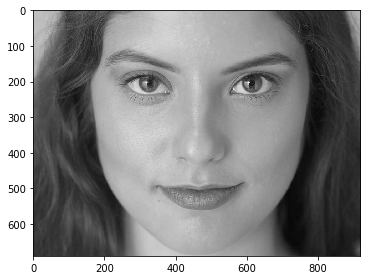

In [28]:
from skimage import io
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import numpy as np
import scipy
from tqdm import trange

img_path = 'face.jpg'
img = io.imread(img_path, as_grey=True)
io.imshow(img)

### Example: Use of the 5th Haar-like feature at different size to identify eyes
Notice here that the feature gets more distinct as the window size increase, but this also increases the noise

Calculating integral image...


100%|████████████████████████████████████████████████████████████████████████████████| 690/690 [00:40<00:00, 17.00it/s]


Integral image calculation complete!
Calculating features...


100%|████████████████████████████████████████████████████████████████████████████████| 671/671 [00:08<00:00, 81.16it/s]


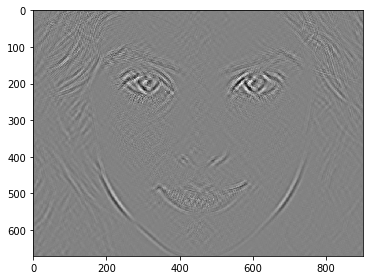

In [42]:
# Example with the square haar filter, at size 10
haar_like_features(img2, 5, 10)

Calculating integral image...


100%|████████████████████████████████████████████████████████████████████████████████| 690/690 [00:38<00:00, 19.08it/s]


Integral image calculation complete!
Calculating features...


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:08<00:00, 79.14it/s]


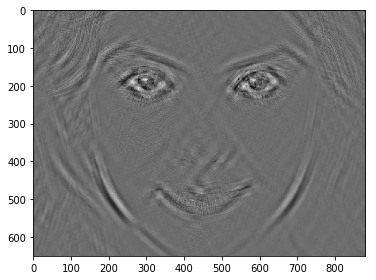

In [43]:
# Example with the square haar filter, at size 20
haar_like_features(img2, 5, 20)

### Example: Use of the vertical Haar-like feature at different size to identify nose

Calculating integral image...


100%|████████████████████████████████████████████████████████████████████████████████| 690/690 [00:38<00:00, 15.89it/s]


Integral image calculation complete!
Calculating features...


100%|███████████████████████████████████████████████████████████████████████████████| 681/681 [00:05<00:00, 135.56it/s]


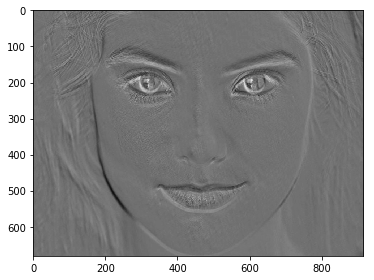

In [44]:
# Example with the vertical haar filter, at size 5
haar_like_features(img2, 2, 5)

Calculating integral image...


100%|████████████████████████████████████████████████████████████████████████████████| 690/690 [00:40<00:00, 15.32it/s]


Integral image calculation complete!
Calculating features...


100%|███████████████████████████████████████████████████████████████████████████████| 671/671 [00:04<00:00, 143.67it/s]


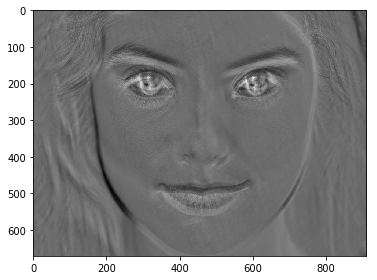

In [45]:
# Example with the vertical haar filter, at size 10
haar_like_features(img2, 2, 10)